In [182]:
#Dependencies and set up
%matplotlib inline

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, sem

import warnings
warnings.filterwarnings("ignore")


## Import 2 files and merge together

In [184]:
fileclinic = "../../RICEHOU201906DATA1/HW/05-Matplotlib/Instructions/Pymaceuticals/data/clinicaltrial_data.csv"
filemouse = "../../RICEHOU201906DATA1/HW/05-Matplotlib/Instructions/Pymaceuticals/data/mouse_drug_data.csv"
clinic = pd.read_csv(fileclinic)
mouse = pd.read_csv(filemouse)
indata = pd.merge(clinic,mouse,on = "Mouse ID", how = "outer")
indata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Group by Drug and Timepoint then compute the mean of Tumor volume

In [185]:
GroupedDT = indata.groupby(["Drug","Timepoint"])
# Solution 1:
#MeanTumor = pd.DataFrame(GroupedDT.mean()["Tumor Volume (mm3)"].reset_index())
#MeanTumor

#Solution 2:
MeanTumor = GroupedDT.mean()["Tumor Volume (mm3)"].to_frame().reset_index()
MeanTumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


## Compute the standard error for mean value of Tumor Volume

In [186]:
SemTumor = GroupedDT["Tumor Volume (mm3)"].sem().to_frame().reset_index()
SemTumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


## Reformat the data and display

In [187]:
nfMeanTumor = GroupedDT.mean()["Tumor Volume (mm3)"].unstack("Drug")
nfMeanTumor

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


## Generate the plot with Error Bar

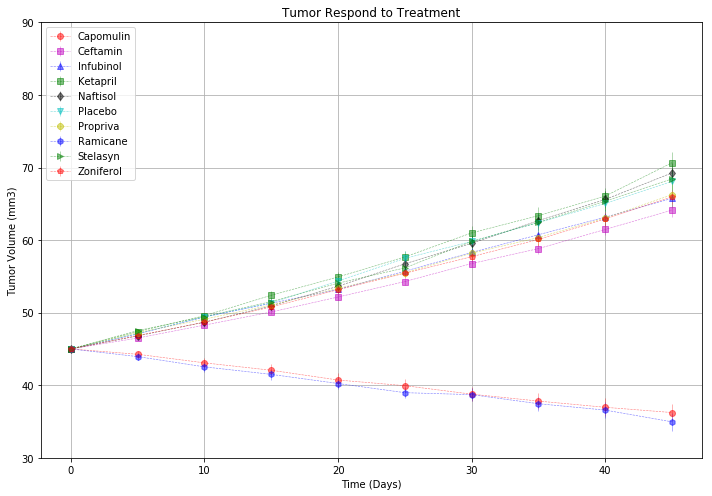

In [188]:
nfSemTumor = GroupedDT["Tumor Volume (mm3)"].sem().unstack("Drug")
fig,ax = plt.subplots(figsize =(10,7))
strstyle = ["ro","ms","b^","gs",'kd',"cv","y8","bh","g>","rp"]
for i in range(len(nfMeanTumor)):
    ax.errorbar(nfMeanTumor.index,nfMeanTumor.iloc[:,i],yerr = nfSemTumor.iloc[:,i],fmt = strstyle[i],ls="--",alpha = 0.5, lw=0.6)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_ylim(30,90)
ax.legend(loc="upper left", fontsize="medium", fancybox=True)
ax.set_title("Tumor Respond to Treatment")
ax.grid()
plt.tight_layout()
plt.savefig("Images/Tumorrespond.png")

In [189]:
plt.show()

## Metastatic Response to Treatment

    Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

    Convert to DataFrame

    Preview DataFrame

In [190]:
MeanMet = GroupedDT["Metastatic Sites"].mean().to_frame().reset_index()
MeanMet.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [191]:
nfMeanMet = GroupedDT["Metastatic Sites"].mean().unstack("Drug")
nfMeanMet.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [192]:
nfSemMet = GroupedDT["Metastatic Sites"].sem().unstack("Drug")
nfSemMet.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


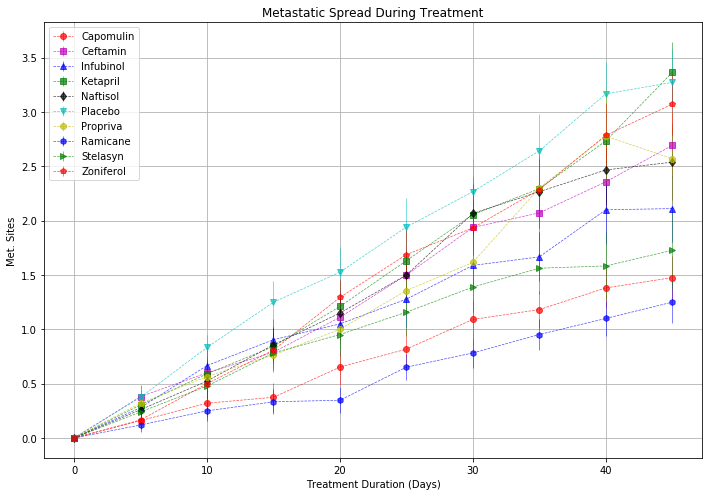

In [202]:
fig,ax = plt.subplots(figsize =(10,7))
strstyle = ["ro","ms","b^","gs",'kd',"cv","y8","bh","g>","rp"]
for i in range(len(nfMeanMet)):
    ax.errorbar(nfMeanMet.index,nfMeanMet.iloc[:,i],yerr = nfSemMet.iloc[:,i],fmt = strstyle[i],ls="--",alpha = 0.7, lw=0.7)
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.legend(loc="best", fontsize="medium", fancybox=True)
ax.set_title("Metastatic Spread During Treatment")
ax.grid()
plt.tight_layout()
plt.savefig("Images/Metastaticspread.png")

   ## Survival Rates

    Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

    Convert to DataFrame

    Preview DataFrame

In [193]:
Numbermouse = GroupedDT["Mouse ID"].count().to_frame().reset_index()
Numbermouse.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [194]:
nfNumbermouse = GroupedDT["Mouse ID"].count().unstack("Drug")
nfNumbermouse

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [195]:
Msurpercent = round(nfNumbermouse*100/nfNumbermouse.iloc[0,:],2)
Msurpercent

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.85,92.0,73.08,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.00,92.0,69.23,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.46,84.0,61.54,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.62,80.0,46.15,56.0


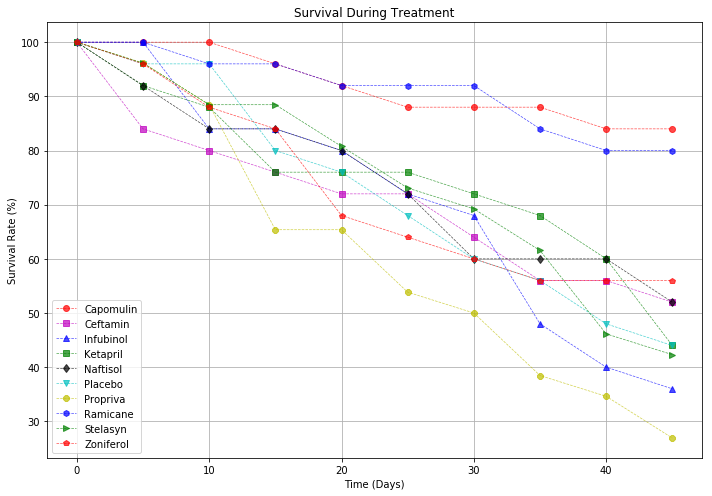

In [199]:
fig,ax = plt.subplots(figsize =(10,7))
strstyle = ["ro","ms","b^","gs",'kd',"cv","y8","bh","g>","rp"]
for i in range(len(Msurpercent)):
    ax.errorbar(Msurpercent.index,Msurpercent.iloc[:,i],fmt = strstyle[i],ls="--",alpha = 0.7, lw=0.7)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.legend(loc="best", fontsize="medium", fancybox=True)
ax.set_title("Survival During Treatment")
ax.grid()
plt.tight_layout()
plt.savefig("Images/Survival.png")
plt.show()

## Summary Bar Graph

    Calculate the percent changes for each drug

    Display the data to confirm

In [200]:
Percentchange =(round((nfMeanTumor - nfMeanTumor.iloc[0,:])*100/nfMeanTumor.iloc[0,:],2).loc[45,:])
tuplepercent = np.array(Percentchange)
tuplepercent

array([-19.48,  42.52,  46.12,  57.03,  53.92,  51.3 ,  47.24, -22.32,
        52.09,  46.58])

In [201]:
Drugrate = Percentchange.apply(lambda x: "Passing" if x <0 else "Failing") 
Drugrate

Drug
Capomulin    Passing
Ceftamin     Failing
Infubinol    Failing
Ketapril     Failing
Naftisol     Failing
Placebo      Failing
Propriva     Failing
Ramicane     Passing
Stelasyn     Failing
Zoniferol    Failing
Name: 45, dtype: object

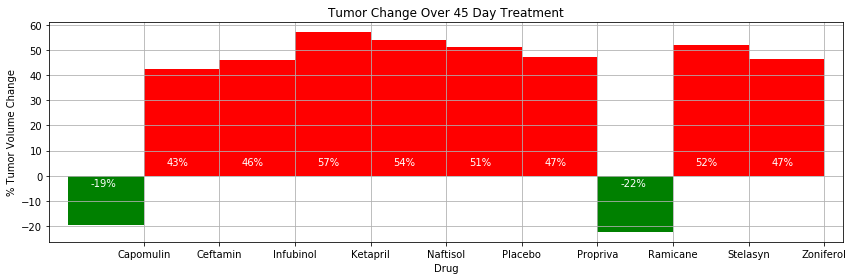

In [198]:
chart = Percentchange.plot(kind = "bar",figsize =(12,4),width = 1,position = 1,color =  (Percentchange>0).map({True:"r",False:"g"}))
plt.grid()
for i in np.arange(0,len(Percentchange)):
    chart.text(i-0.7,(Percentchange[i]>0 and 4 or -4),str("{:.0f}%".format(round(Percentchange[i]))),color ="w")
                    #(4 if Percentchange[i]>0 else -4)
plt.title("Tumor Change Over 45 Day Treatment")
chart.set_ylabel("% Tumor Volume Change")
chart.set_xticklabels(Percentchange.index,rotation = 0)
plt.tight_layout()
plt.savefig("Images/Percentchange.png")
plt.show()